This notebook uses the packages __pandas__(loads datasets and output tables), __numpy__(label formatting) and __matplotlib__(contains module for plotting graphs). In this project, the datasets used are the __gissette__, __madelon__ and __dexter__ datasets. The folders containing the three datasets must be in the same directory as this notebook. 

In order to run the code for this project, the following packages must be imported first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

The style and size used for graph and fonts were found in:
https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

In [2]:
# style and size for graph fonts
fontdict_title = {'fontsize': 24, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_xlabel = {'fontsize': 18, 'weight': 'bold', 'horizontalalignment': 'center'}
fontdict_ylabel = {'fontsize': 16, 'weight': 'bold', 'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

Helper functions defined below are part of logistic regression algorithm. ___sigmoid___ applies the sigmoid function to a numpy array. ___log_likelihood___ applies the log-likelihood function to a numpy array. This function is used as the __loss function__ for this project. ___prediction___ returns a numpy array of the same size as the input numpy array with values assigned according to the threshold: assigns 1 if the value is more than or equal to 0.5 otherwise, 0. ___misclassification_error___ calculates the mean misclassification error by comparing the values predicted with the actual labels and counting how many were incorrectly misclassified. The output of this function is then _amount of misclassifications/amount of classifications_. Finally, ___normalize___ normalizes a dataset.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def log_likelihood(x, y, w):
    z = np.dot(x, w)
    return np.sum(y * z - np.log(1 + np.exp(z))) / z.size


def prediction(probabilities, threshold=0.5):
    return np.where(probabilities >= threshold, 1, 0)


def misclassification_error(predictions, labels):
    return np.where(predictions != labels, 1, 0).mean()


def normalize(m, std, data):
    return (data - m) / std

Function for the logistic regression algorithm. This function returns the mean classification error for the training, all the loss values and the last updated weights after all the iterations. The intercept is set to 0.

In [4]:
def log_regression(features, labels, learning_rate, iterations, shrinkage=0.0001):
    misclassification_errors = []
    loss = []
    intercept = np.zeros((features.shape[0], 1))
    features = np.hstack((intercept, features))
    weights = np.zeros(features.shape[1])
    observation_num = features.size

    for iteration in range(1, iterations + 1):
        scores = np.dot(features, weights)
        probs = sigmoid(scores)
        pred = prediction(probs)
        error = misclassification_error(labels, pred)
        misclassification_errors.append(error)

        # Calculate gradient
        gradient = np.dot(features.T, labels - probs)
        # Update weights
        weights += -(learning_rate * shrinkage * weights) + ((learning_rate * gradient) / observation_num)
        # Calculate log likelihood and store it in a list
        ll = np.mean(log_likelihood(features, labels, weights))
        loss.append(ll)
    mean_error = mean(misclassification_errors)
    return mean_error, loss, weights

# Problem 1: Logistic Regression: Gisette Dataset

Load training and test set

In [5]:
gisette_train_data = pd.read_csv("./Gisette/gisette_train.data", header=None, sep=" ").dropna(axis=1).values
gisette_train_labels = np.where(np.ravel(
    pd.read_csv("./Gisette/gisette_train.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

gisette_test_data = pd.read_csv("./Gisette/gisette_valid.data", header=None, sep=" ").dropna(axis=1).values

gisette_test_labels = np.where(np.ravel(
    pd.read_csv("./Gisette/gisette_valid.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

Normalize training and test set

In [6]:
gisette_train_data_mean = gisette_train_data.mean(axis=0)
gisette_train_data_std = np.where(gisette_train_data.std(axis=0) == 0, 1, gisette_train_data.std(axis=0))
normalized_gisette_train_data = normalize(gisette_train_data_mean, gisette_train_data_std, gisette_train_data)
normalized_gisette_test_data = normalize(gisette_train_data_mean, gisette_train_data_std, gisette_test_data)

Set learning rate and iterations

In [7]:
iters = 1000
gisette_learning_rate = 900

Run logistic regression and store the train error, losses and weights

In [8]:
gisette_train_error, gisette_train_loss, gisette_train_weights = log_regression(normalized_gisette_train_data,
                                                                                gisette_train_labels,
                                                                                gisette_learning_rate, iters)

Add extra column to test set to account for the intercept. 

In [9]:
intercept_test = np.zeros((normalized_gisette_test_data.shape[0], 1))
normalized_gisette_test_data = np.hstack((intercept_test, normalized_gisette_test_data))

Predict using the test set and calculate the test error

In [10]:
gisette_test_scores = np.dot(normalized_gisette_test_data, gisette_train_weights)
gisette_test_preds = prediction(sigmoid(gisette_test_scores))
gisette_test_error = misclassification_error(gisette_test_labels, gisette_test_preds)

Creates figure object. This is in its own cell so that the plots appear in the correct size.

In [11]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Plot a graph of loss vs iteration number

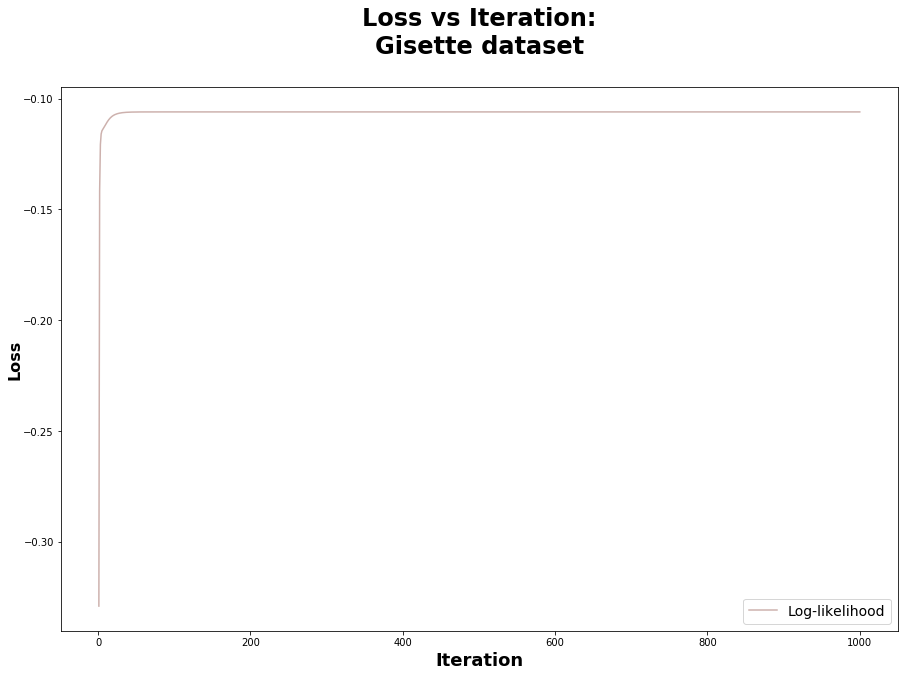

In [12]:
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Loss vs Iteration:\nGisette dataset\n", fontdict=fontdict_title)
plt.xlabel("Iteration", fontdict=fontdict_xlabel)
plt.ylabel("Loss", fontdict=fontdict_ylabel)

# plotting
plt.plot(list(range(1, iters + 1)), gisette_train_loss,
         color="#CDB1AD",
         linestyle="-",
         label="Log-likelihood")
plt.legend(fontsize=14);

# Problem 2: Logistic Regression: Madelon Dataset

Load training and test set

In [13]:
madelon_train_data = pd.read_csv("./madelon/madelon_train.data", header=None, sep=" ").dropna(axis=1).values
madelon_train_labels = np.where(np.ravel(
    pd.read_csv("./madelon/madelon_train.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

madelon_test_data = pd.read_csv("./madelon/madelon_valid.data", header=None, sep=" ").dropna(axis=1).values

madelon_test_labels = np.where(np.ravel(
    pd.read_csv("./madelon/madelon_valid.labels", header=None, sep=" ").dropna(axis=1).values) == -1, 0, 1)

Normalize training and test set

In [14]:
madelon_train_data_mean = madelon_train_data.mean(axis=0)
madelon_train_data_std = np.where(madelon_train_data.std(axis=0) == 0, 1, madelon_train_data.std(axis=0))
normalized_madelon_train_data = normalize(madelon_train_data_mean, madelon_train_data_std, madelon_train_data)
normalized_madelon_test_data = normalize(madelon_train_data_mean, madelon_train_data_std, madelon_test_data)

Set learning rate and iterations

In [15]:
iters = 1000
madelon_learning_rate = 660

Run logistic regression and store the train error, losses and weights

In [16]:
madelon_train_error, madelon_train_loss, madelon_train_weights = log_regression(normalized_madelon_train_data,
                                                                                madelon_train_labels,
                                                                                madelon_learning_rate, iters)

Add extra column to test set to account for the intercept.

In [17]:
intercept_test = np.zeros((normalized_madelon_test_data.shape[0], 1))
normalized_madelon_test_data = np.hstack((intercept_test, normalized_madelon_test_data))

Predict using the test set and calculate the test error

In [18]:
madelon_test_scores = np.dot(normalized_madelon_test_data, madelon_train_weights)
madelon_test_preds = prediction(sigmoid(madelon_test_scores))
madelon_test_error = misclassification_error(madelon_test_labels, madelon_test_preds)

Plot a graph of loss vs iteration number

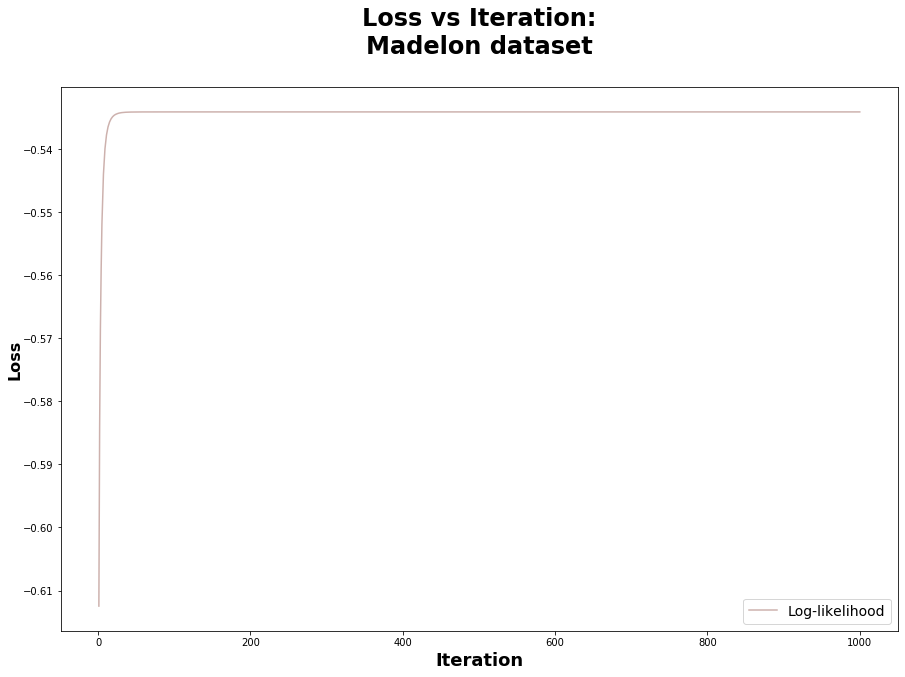

In [19]:
fig = plt.figure()
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Loss vs Iteration:\nMadelon dataset\n", fontdict=fontdict_title)
plt.xlabel("Iteration", fontdict=fontdict_xlabel)
plt.ylabel("Loss", fontdict=fontdict_ylabel)

# plotting
plt.plot(list(range(1, iters + 1)), madelon_train_loss,
         color="#CDB1AD",
         linestyle="-",
         label="Log-likelihood")
plt.legend(fontsize=14);

# Problem 3: Logistic Regression: Dexter Dataset

Create csv files from __dexter_train.data__ and __dexter_test.data__ in order to load it with pandas.

In [20]:
def reformat_file(input_filepath, output_filepath, row_num, col_num):
    output_file = open(output_filepath, "w+")
    with open(input_filepath, "r") as fp:
        for obs in range(0, row_num):
            line = fp.readline()
            strs = line.split(" ")
            output_line = ["0" for col in range(0, col_num)]

            for s in strs:
                if s != "\n":
                    i, value = s.split(":")
                    output_line[int(i)] = value

            output_file.write(",".join(output_line) + "\n")

    output_file.close()

reformat_file("./dexter/dexter_train.data", "./dexter/dexter_train.csv", 300, 20000)
reformat_file("./dexter/dexter_valid.data", "./dexter/dexter_valid.csv", 300, 20000)

Load training and test set

In [21]:
dexter_train_data = pd.read_csv("./dexter/dexter_train.csv", header=None).values
dexter_train_labels = np.where(np.ravel(pd.read_csv("./dexter/dexter_train.labels", header=None).values) == -1, 0, 1)
dexter_test_data = pd.read_csv("./dexter/dexter_valid.csv", header=None).values
dexter_test_labels = np.where(np.ravel(pd.read_csv("./dexter/dexter_valid.labels", header=None).values) == -1, 0, 1)

Normalize training and test set

In [22]:
dexter_train_data_mean = dexter_train_data.mean(axis=0)
dexter_train_data_std = np.where(dexter_train_data.std(axis=0) == 0, 1, dexter_train_data.std(axis=0))
normalized_dexter_train_data = normalize(dexter_train_data_mean, dexter_train_data_std, dexter_train_data)
normalized_dexter_test_data = normalize(dexter_train_data_mean, dexter_train_data_std, dexter_test_data)

Set learning rate and iterations. After several experimentation, 1000 was the largest learning rate value where it converges.

In [23]:
iters = 1000
dexter_learning_rate = 19

Run logistic regression and store the train error, losses and weights

In [24]:
dexter_train_error, dexter_train_loss, dexter_train_weights = log_regression(normalized_dexter_train_data,
                                                                             dexter_train_labels,
                                                                             dexter_learning_rate, iters)

Add extra column to test set to account for the intercept. 

In [25]:
intercept_test = np.zeros((normalized_dexter_test_data.shape[0], 1))
normalized_dexter_test_data = np.hstack((intercept_test, normalized_dexter_test_data))

Predict using the test set and calculate the test error

In [26]:
dexter_test_scores = np.dot(normalized_dexter_test_data, dexter_train_weights)
dexter_test_preds = prediction(sigmoid(dexter_test_scores))
dexter_test_error = misclassification_error(dexter_test_labels, dexter_test_preds)

Plot a graph of loss vs iteration number

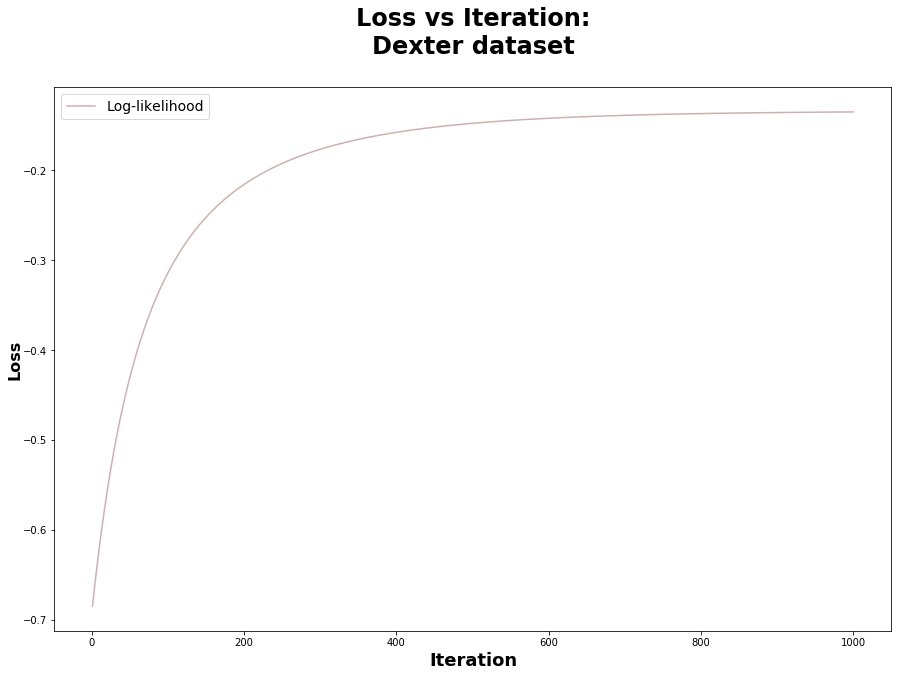

In [27]:
fig = plt.figure()
# size of graph
plt.rcParams['figure.figsize'] = [15, 10]  # size=15x10 inches

# labels
plt.title("Loss vs Iteration:\nDexter dataset\n", fontdict=fontdict_title)
plt.xlabel("Iteration", fontdict=fontdict_xlabel)
plt.ylabel("Loss", fontdict=fontdict_ylabel)

# plotting
plt.plot(list(range(1, iters + 1)), dexter_train_loss,
         color="#CDB1AD",
         linestyle="-",
         label="Log-likelihood")
plt.legend(fontsize=14);

# Training and Test Misclassification Error Table

In [28]:
# Create labels
rows_labels = ["Gisette","Madelon", "Dexter", ]
columns_labels = ["Dataset","Training Error","Test Error"]

# Store the misclassification error from each dataset for training and testing
misclassification_errors = {
    columns_labels[1]: [gisette_train_error, madelon_train_error, dexter_train_error],
    columns_labels[2]: [gisette_test_error, madelon_test_error, dexter_test_error]
}

# Create dataframe to output table
error_tabledf=pd.DataFrame(misclassification_errors, index=rows_labels)
error_tabledf.index.name = columns_labels[0]
error_tabledf

,Training Error,Test Error
Dataset,,
Gisette,0.013211,0.023
Madelon,0.262941,0.420
Dexter,0.000500,0.130
